# Week3_授業前課題2_住宅情報の分析

### エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

[Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

### KaggleのNotebooks
Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

《参考Notebooks》

[Comprehensive data exploration with Python | Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)（まずはここから）

[House Prices : EDA to ML (Beginner) | Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)

[A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)

## 【問題1】データセットの取得
`pd.read_csv()`を使用して、変数に格納してください。

In [1]:
import pandas as pd
df = pd.read_csv('train.csv', index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

- 79の説明変数があり、エイムズ市の住宅の特徴を示している
- 79の説明変数から最終的な住宅価格を予測する（SalePriceが予測使用としているターゲット変数）

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [2]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
data_check = pd.DataFrame([df[column].dtype for column in df.columns], index=df.columns, columns=['dtype'])
data_check

,dtype
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [3]:
data_check.dtype.value_counts()

object     43
int64      34
float64     3
Name: dtype, dtype: int64

In [4]:
# 今回の目的変数はどの列か確認する。
df.iloc[:,-1] #最終列、ラベルSalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.iloc[:, :-1].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認には`missingno`というライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

/Users/ikeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


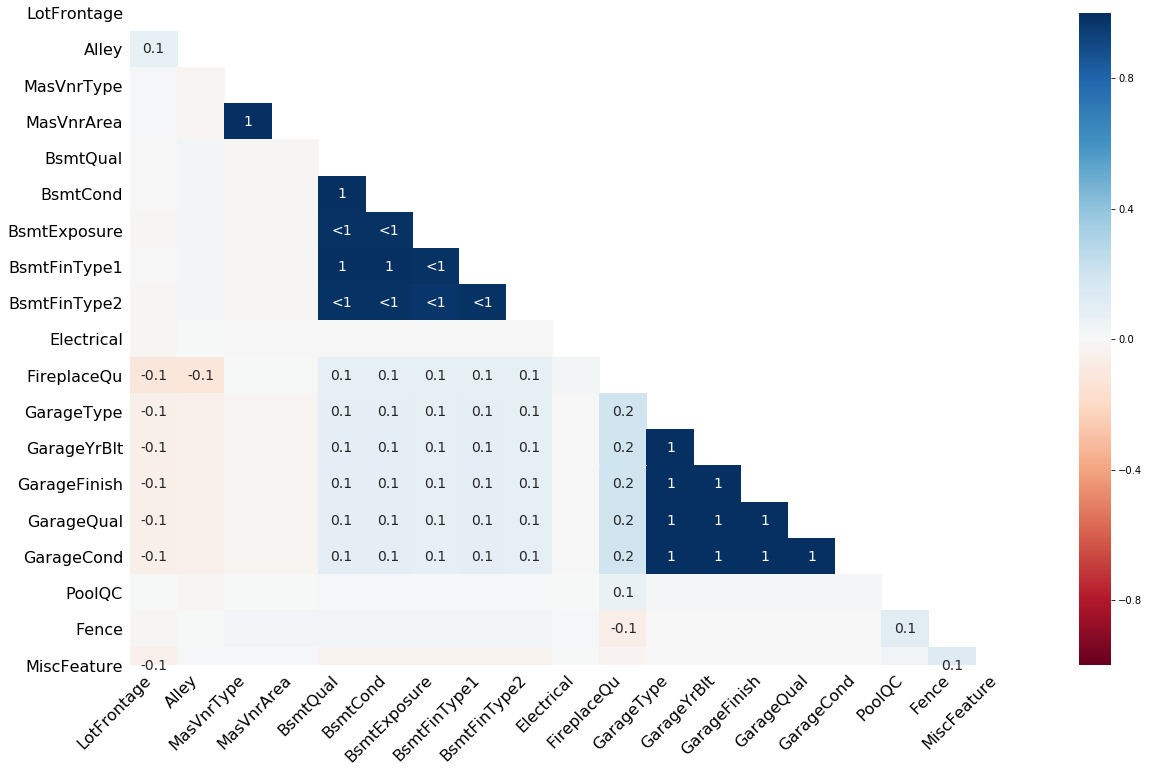

In [6]:
import missingno as msno
%matplotlib inline
msno.heatmap(df);

In [7]:
# 欠損値が何パーセント含まれるかを確認する。
def missing_df_check(df):
    missing_df = pd.DataFrame(df.count(), columns=['count'])
    missing_df['is_null'] = df.isnull().sum()
    missing_df['total'] = missing_df['count']+ missing_df['is_null']
    missing_df['missing_ratio'] = missing_df['is_null'] / missing_df['total']
    return missing_df
missing_df_check(df)[missing_df_check(df)['missing_ratio']>0]

,count,is_null,total,missing_ratio
LotFrontage,1201,259,1460,0.177397
Alley,91,1369,1460,0.937671
MasVnrType,1452,8,1460,0.005479
MasVnrArea,1452,8,1460,0.005479
BsmtQual,1423,37,1460,0.025342
BsmtCond,1423,37,1460,0.025342
BsmtExposure,1422,38,1460,0.026027
BsmtFinType1,1423,37,1460,0.025342
BsmtFinType2,1422,38,1460,0.026027
Electrical,1459,1,1460,0.000685


In [8]:
# 5つ以上欠損値がある特徴量（列）は削除する。
drop_standard = 5
df_dropna = df.dropna(thresh=len(df)-drop_standard+1, axis=1)
missing_df_check(df_dropna)

,count,is_null,total,missing_ratio
MSSubClass,1460,0,1460,0.0
MSZoning,1460,0,1460,0.0
LotArea,1460,0,1460,0.0
Street,1460,0,1460,0.0
LotShape,1460,0,1460,0.0
...,...,...,...,...
MoSold,1460,0,1460,0.0
YrSold,1460,0,1460,0.0
SaleType,1460,0,1460,0.0
SaleCondition,1460,0,1460,0.0


In [9]:
missing_df_check(df_dropna)[missing_df_check(df_dropna)['missing_ratio']>0]

,count,is_null,total,missing_ratio
Electrical,1459,1,1460,0.000685


In [10]:
# 欠損値がある行を確認(index=1380)
df_dropna[df_dropna.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [11]:
# 欠損値があるサンプル（行）は削除する。
df_dropna = df_dropna.dropna(how='any')
missing_df_check(df_dropna)

,count,is_null,total,missing_ratio
MSSubClass,1459,0,1459,0.0
MSZoning,1459,0,1459,0.0
LotArea,1459,0,1459,0.0
Street,1459,0,1459,0.0
LotShape,1459,0,1459,0.0
...,...,...,...,...
MoSold,1459,0,1459,0.0
YrSold,1459,0,1459,0.0
SaleType,1459,0,1459,0.0
SaleCondition,1459,0,1459,0.0


In [12]:
#欠損値が消去されていることを確認
missing_df_check(df_dropna)[missing_df_check(df_dropna)['missing_ratio']>0]

,count,is_null,total,missing_ratio


In [13]:
#　index=1380が消去されていることを確認
df_dropna[df_dropna.index==1380]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度（kurtosis）
    - 分布が正規分布からどれだけ尖っているかを表す統計量
    - 正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値を、正規分布の場合には0をとる
    - 尖度は下式から算出される
$$
\frac{n(n+1)}{(n-1)(n-2)(n-3)} \displaystyle \sum_{i = 1}^n 
\frac{(x_i - \overline{x})^4}{s^4} - \frac{3(n-1)^2}{(n-2)(n-3)}
$$
- 歪度（skewness） 
    - 分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標
    - 「右裾が長い」「右に歪んだ」「左に偏った」分布のときには正の値を、「左裾が長い」「左に歪んだ」「右に偏った」分布のときには負の値を、左右対称の分布の場合には0をとる
    - 歪度は下式から算出される
$$
\displaystyle \frac{n}{(n - 1)(n - 2)}
\displaystyle \sum_{i = 1}^n 
\left(\frac{x_i - \overline{x}}{s}\right)^3
$$

## 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

[seaborn.distplot — seaborn 0.9.0 documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)

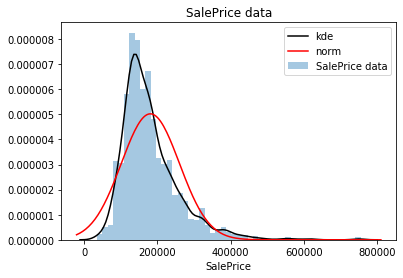

In [14]:
# seabornのsns.distplot()を使い目的変数の分布を表示
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis, skew
sns.distplot(df_dropna['SalePrice'], label='SalePrice data', 
             kde_kws={'label': 'kde','color':'k'},
             fit=norm,fit_kws={'label': 'norm','color':'red'})
plt.title('SalePrice data')
plt.legend();

In [15]:
# 「尖度」と「歪度」も算出する。
kurtosis_data = kurtosis(df_dropna['SalePrice'])
skew_data = skew(df_dropna['SalePrice'])
print('尖度：{}'.format(kurtosis_data))
print('歪度：{}'.format(skew_data))

尖度：6.502799105301849
歪度：1.880007613681095


In [16]:
# 目的変数に対して対数変換を行う。
import numpy as np
SalePrice_log = np.log(df_dropna['SalePrice'])
SalePrice_log

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: SalePrice, Length: 1459, dtype: float64

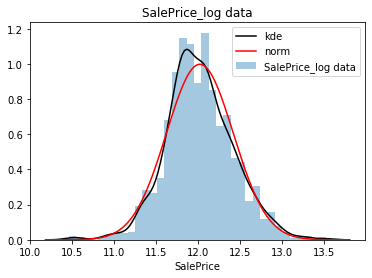

In [17]:
# 対数変換したものに対して分布を表示
sns.distplot(SalePrice_log, label='SalePrice_log data', 
             kde_kws={'label': 'kde','color':'k'},
             fit=norm,fit_kws={'label': 'norm','color':'red'})
plt.title('SalePrice_log data')
plt.legend();

In [18]:
# 「尖度」と「歪度」も算出する。
kurtosis_log = kurtosis(SalePrice_log)
skew_log = skew(SalePrice_log)
print('尖度：{}'.format(kurtosis_log))
print('歪度：{}'.format(skew_log))

尖度：0.8000555650770789
歪度：0.12119299622459463


##### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。
- 対数変換の後では、尖度、歪度が共に０に近づいたため、より正規分布に近い分布に変化した
- 対数変換をすることで、変数の変化量のみに着目した予測ではなく、変化率に応じた予測が可能になる

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

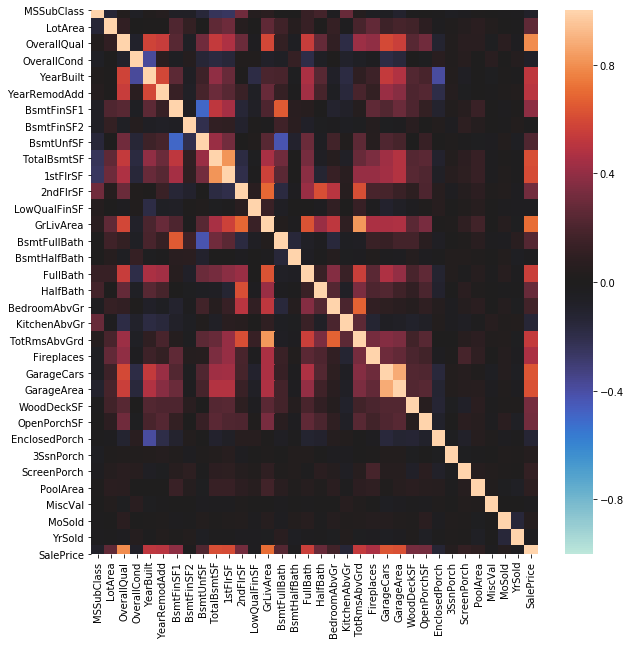

In [19]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
corr_matrix = df_dropna.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,
            vmin=-1.0,
            vmax=1.0,
            center=0);

In [20]:
# 相関係数の絶対値が0.6以上のものの組み合わせ
# for num, column in enumerate(corr_matrix.columns):
#     for index_num in range(num+1, len(corr_matrix.index)):
#         if abs(corr_matrix[column].iloc[index_num]) >= 0.6:
#             print([corr_matrix.index[index_num], column, corr_matrix[column].iloc[index_num]])

In [21]:
# 相関係数の絶対値が0.6以上のものの組み合わせ
sort_corr_matrix = corr_matrix.abs().unstack().drop_duplicates()[1:].sort_values(ascending=False)
sort_corr_matrix[(sort_corr_matrix >= 0.6)]

GarageCars    GarageArea      0.882613
GrLivArea     TotRmsAbvGrd    0.825576
TotalBsmtSF   1stFlrSF        0.819393
OverallQual   SalePrice       0.791069
GrLivArea     SalePrice       0.708618
2ndFlrSF      GrLivArea       0.687726
BedroomAbvGr  TotRmsAbvGrd    0.676613
BsmtFinSF1    BsmtFullBath    0.649025
GarageCars    SalePrice       0.640473
GrLivArea     FullBath        0.630283
GarageArea    SalePrice       0.623423
2ndFlrSF      TotRmsAbvGrd    0.616400
TotalBsmtSF   SalePrice       0.613905
2ndFlrSF      HalfBath        0.609551
1stFlrSF      SalePrice       0.605968
OverallQual   GarageCars      0.600991
dtype: float64

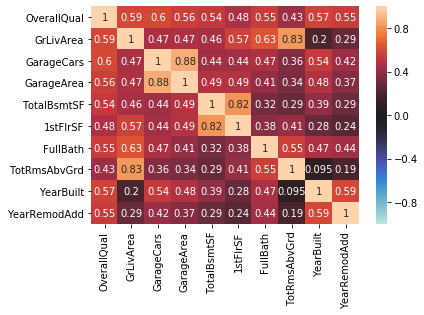

In [22]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
corr_SalePrice = pd.DataFrame(corr_matrix['SalePrice'])
corr_SalePrice['SalePrice_abs'] = abs(corr_SalePrice['SalePrice'])
corr_SalePrice.sort_values(by='SalePrice_abs', ascending=False, inplace=True)
feature_choice = corr_SalePrice.iloc[1:11].index
corr_matrix_choice = df_dropna[feature_choice].corr()

sns.heatmap(corr_matrix_choice,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True)
plt.ylim(10, 0);

##### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
1. OverallQual
    - 家全体の材質と仕上がり具合を評価した指標。1点 (Very poor)〜10点(Very Excellent)で評価
2. GrLivArea
    - 1階以上の居住空間の面積(feet)
3. GarageCars
    - ガレージに駐車可能な台数
4. GarageArea
    - ガレージの面積(feet)
5. TotalBsmtSF
    - 地下室の面積(feet)
6. 1stFlrSF
    - 1階の面積(feet)
7. FullBath
    - 1階以上にある浴室数
8. TotRmsAbvGrd
    - 1階以上にある全体部屋数（浴室は含まない）
9. YearBuilt
    - 新築時の西暦
10. YearRemodAdd
    - 改築時の西暦（改築されていない場合は新築時の西暦）

In [23]:
# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
corr_comb = corr_matrix_choice.unstack().drop_duplicates()[1:].sort_values(ascending=False)
corr_comb[:3]

GarageCars   GarageArea      0.882613
GrLivArea    TotRmsAbvGrd    0.825576
TotalBsmtSF  1stFlrSF        0.819393
dtype: float64